In [ ]:
!pip install tensorflow
!pip install stable_baselines3
!pip install gym
!pip install gym-anytrading
!pip install tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 4.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - RL stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load GME trading data
df = pd.read_csv('gmedata.csv')

# Convert data to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

# Set Date as the index
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [ ]:
# Create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)

# Explore the environment
env.action_space

In [ ]:
# View environment features
env.unwrapped.signal_features

In [ ]:
# View environment prices
env.unwrapped.prices

info {'total_reward': 165.2800054550171, 'total_profit': 1.2660997120632607, 'position': <Positions.Long: 1>}


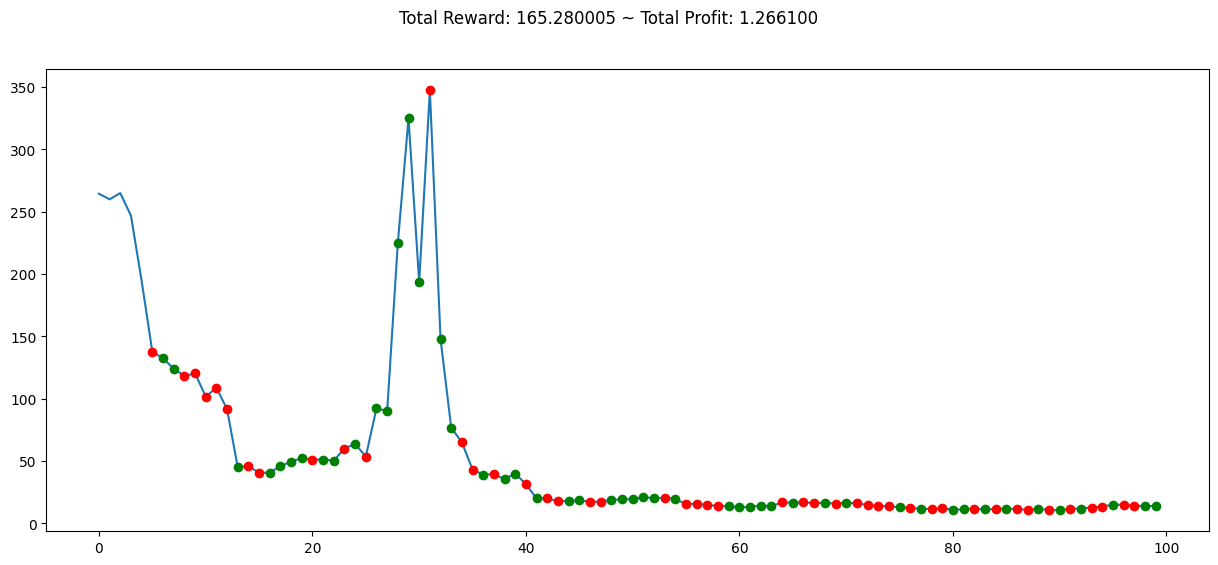

In [ ]:
observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

In [ ]:
# Creating our dummy vectorizing environment
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
env = DummyVecEnv([env_maker])

# Initializing and training the A2C model
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
|    value_loss         | 0.098     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 648       |
|    iterations         | 164400    |
|    time_elapsed       | 1268      |
|    total_timesteps    | 822000    |
| train/                |           |
|    entropy_loss       | -0.000104 |
|    explained_variance | -0.177    |
|    learning_rate      | 0.0007    |
|    n_updates          | 164399    |
|    policy_loss        | -2.14e-08 |
|    value_loss         | 1.04e-05  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 648       |
|    iterations         | 164500    |
|    time_elapsed       | 1269      |
|    total_timesteps    | 822500    |
| train/                |           |
|    entropy_loss       | -0.000114 |
|    explained_variance | -1.02

info {'total_reward': 0.0, 'total_profit': 0.9427062096980909, 'position': <Positions.Long: 1>}


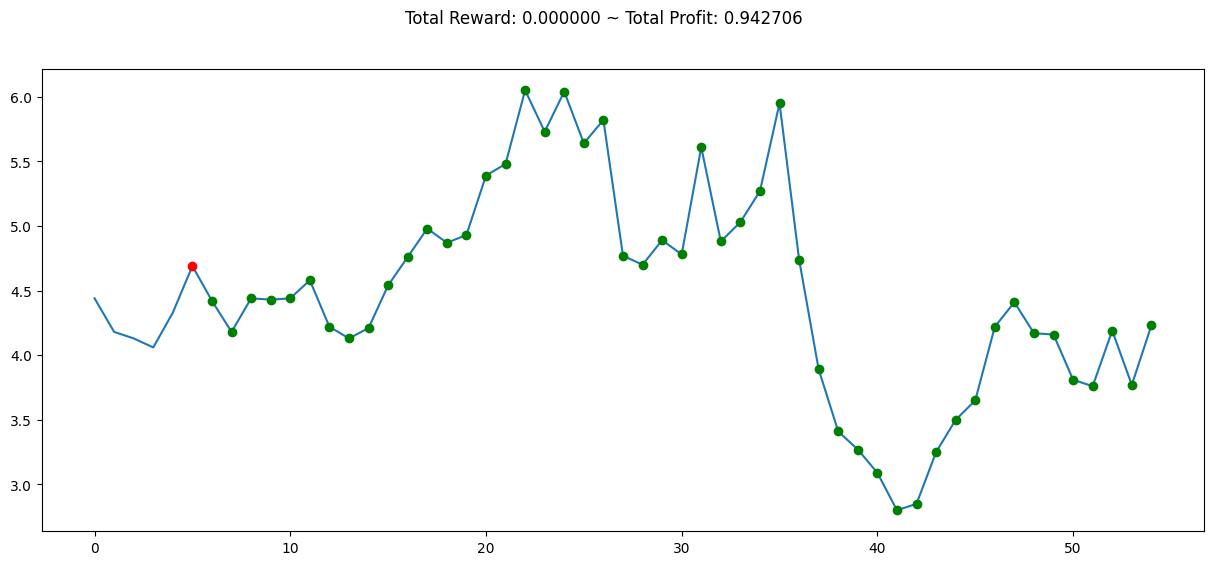

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(200,250), window_size=5)
obs = env.reset()

# Unpack the tuple
array_obs, dict_obs = obs

# Add a new axis to the array part
array_obs = array_obs[np.newaxis, ...]

while True:
    obs = array_obs
    action, _states = model.predict(obs)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()